<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏡</h1></center>

<center><img src="https://images.unsplash.com/photo-1516156008625-3a9d6067fab5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"></center>

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">About the Dataset</h2>

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the Essential Libraries, Metrics</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pickle

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor,StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the Data</h1>

In [2]:
df = pd.read_csv("D:\Data_Science\Machine_Learning\House_Prices\Real Estate Data V21.csv\indian_real_estate.csv")

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Exploratory Data Analysis</h1>

***Taking a look at the first 5 rows of the dataset***

In [3]:
df.head()

,property_title,location,total_area,price_per_sqft,baths,balcony
0,"4 BHK Flat for sale in Kanathur Reddikuppam, C...","Kanathur Reddikuppam, Chennai",2583,7700,4,Yes
1,10 BHK Independent House for sale in Pozhichal...,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210,6,Yes
2,"3 BHK Flat for sale in West Tambaram, Chennai","Kasthuribai Nagar, West Tambaram,Chennai",1320,7580,3,No
3,7 BHK Independent House for sale in Triplicane...,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840,5,Yes
4,"2 BHK Flat for sale in Avadi, Chennai","Avadi, Chennai",960,5000,3,Yes


***Checking the shape—i.e. size—of the data***

In [4]:
df.shape

(14521, 6)

***Learning the dtypes of columns' and how many non-null values are there in those columns***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14521 entries, 0 to 14520
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_title  14521 non-null  object
 1   location        14521 non-null  object
 2   total_area      14521 non-null  int64 
 3   price_per_sqft  14521 non-null  int64 
 4   baths           14521 non-null  int64 
 5   balcony         14521 non-null  object
dtypes: int64(3), object(3)
memory usage: 680.8+ KB


***Getting the statistical summary of dataset***

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,14521.0,1296.410302,1239.278021,70.0,650.0,1000.0,1438.0,35000.0
price_per_sqft,14521.0,11667.392053,48723.970262,0.0,4480.0,6050.0,9310.0,999000.0
baths,14521.0,2.751188,0.897810,1.0,2.0,3.0,3.0,6.0


***Visualizing the correlations between numerical variables***

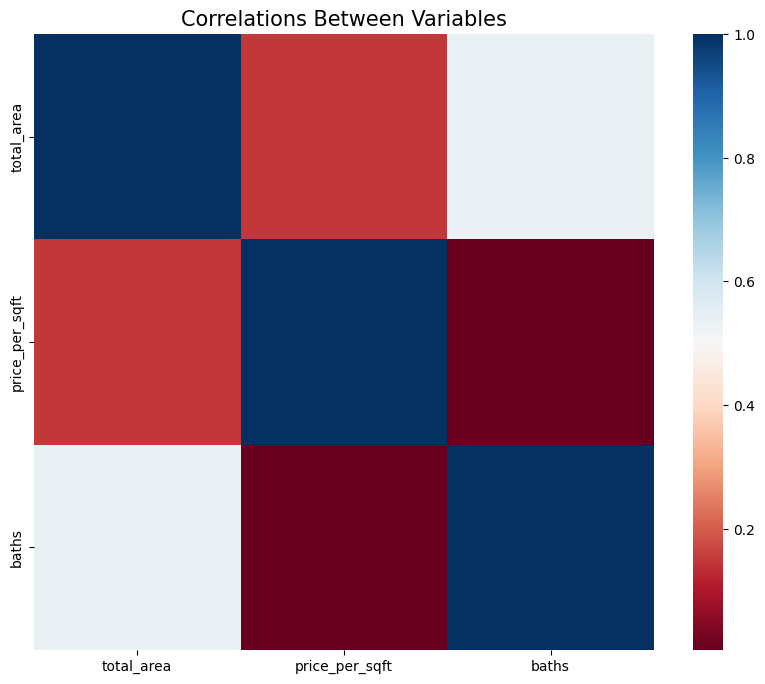

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature Selection</h1>

In [8]:
df['price']=df['total_area']*df['price_per_sqft']

In [9]:
df.drop('price_per_sqft',axis=1,inplace=True)

***Checking for the missing values***

In [10]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
property_title    0
location          0
total_area        0
baths             0
balcony           0
price             0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Data Visualization</h1>

***Visualizing the Correlation between the numerical variables using pairplot visualization***

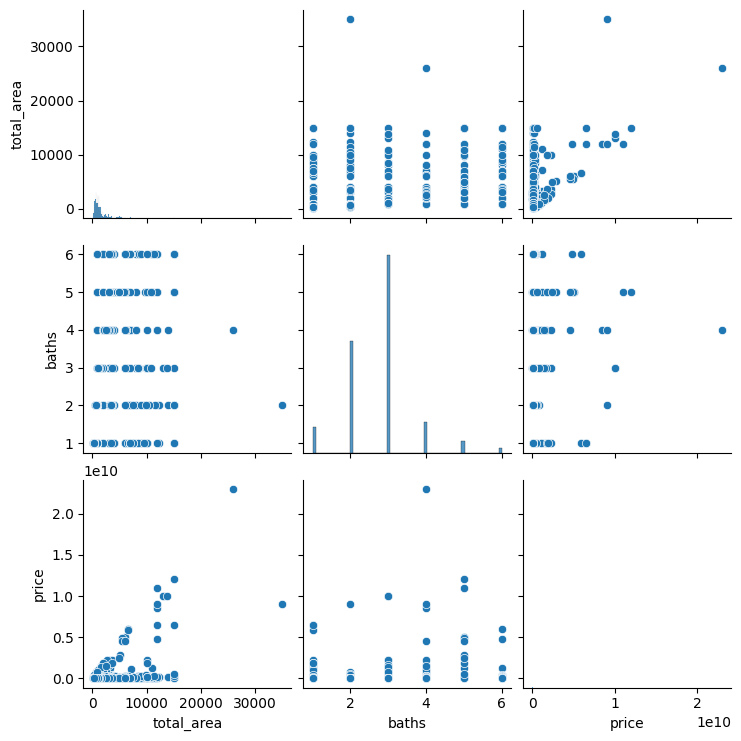

In [11]:
sns.pairplot(df)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Data Pre-Processing</h1>

***Making Data Ready for Training***

In [12]:
df['no_of_rooms'] = df['property_title'].str.split(" ").str[0]
df['flat_type'] = df['property_title'].str.split(" ").str[1]
df['city'] = df['location'].str.split(",").str[-1]
df['city'] = df['city'].str.strip(" ")

In [13]:
df['city'].replace("New Delhi","Delhi",inplace=True)

In [14]:
df.drop('property_title',axis=1,inplace=True)
df.drop('location',axis=1,inplace=True)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">One-Hot Encoding</h1>

***Encoding the categorical features in X dataset manually to better use in Streamlit App***

In [15]:
df['balcony'].replace('Yes',1,inplace=True)
df['balcony'].replace('No',0,inplace=True)

In [16]:
df.replace('Chennai',0,inplace=True)
df.replace('Bangalore',1,inplace=True)
df.replace('Hyderabad',2,inplace=True)
df.replace('Mumbai',3,inplace=True)
df.replace('Thane',4,inplace=True)
df.replace('Kolkata',5,inplace=True)
df.replace('Pune',6,inplace=True)
df.replace('Delhi',7,inplace=True)

In [17]:
df['flat_type'].replace('Independent','RK',inplace=True)
df['flat_type'].replace('Flat','BHK',inplace=True)

In [18]:
df.replace('BHK',0,inplace=True)
df.replace('RK',1,inplace=True)
df.replace('R',2,inplace=True)
df.replace('BH',3,inplace=True)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Standardizing the Data</h1>

***Standardizing the numerical columns in dataset. Adjusts the minimum of the features as 0 and maximum features as 1 for better prediction manually:***

In [19]:
Q1 = df.total_area.quantile(0.25)
Q3 = df.total_area.quantile(0.75)
IQR = Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df = df[(df.total_area>lower_limit)&(df.total_area<upper_limit)]
df['total_area_scaled'] = df['total_area']/df['total_area'].max()

In [20]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df = df[(df.price>lower_limit)&(df.price<upper_limit)]
df['price_scaled'] = df['price']/df['price'].max()

In [21]:
df.drop('total_area',axis=1,inplace=True)
df.drop('price',axis=1,inplace=True)

In [22]:
df['no_of_rooms'] = df['no_of_rooms'].astype('int')
Q1 = df.no_of_rooms.quantile(0.25)
Q3 = df.no_of_rooms.quantile(0.75)
IQR = Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df = df[(df.no_of_rooms>lower_limit)&(df.no_of_rooms<upper_limit)]

In [23]:
Q1 = df.baths.quantile(0.25)
Q3 = df.baths.quantile(0.75)
IQR = Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df = df[(df.baths>lower_limit)&(df.baths<upper_limit)]

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">X, y Split</h1>

***Splitting the data into X and y chunks***

In [24]:
X = df.drop('price_scaled',axis=1)
y = df['price_scaled']

***Splitting the data into Train and Test chunks for better evaluation***

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(f"X: {X.shape}")
print(f"y: {y.shape}")
print(f"X_Train: {X_train.shape}")
print(f"X_Test: {X_test.shape}")
print(f"y_Train: {y_train.shape}")
print(f"y_Train: {y_test.shape}")

X: (11947, 6)
y: (11947,)
X_Train: (9557, 6)
X_Test: (2390, 6)
y_Train: (9557,)
y_Train: (2390,)


***Defining several evaluation functions for convenience***

In [27]:
def evaluate(model, predictions):
    rmse_cross_val = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r_squared = r2_score(y_test, predictions)
    
    print("Accuracy:", model.score(X_test, y_test).mean())
    print("Cross Val Score:", cross_val_score(model, X_test, y_test).mean())
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", rmse_cross_val)
    print("-" * 30)
    print("RMSE Cross-Validation:", rmse_cross_val)
        
    new_row = pd.DataFrame({
        "Model": [str(model)],
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "R2 Score": [r_squared],
        "RMSE (Cross-Validation)": [rmse_cross_val]
    })
    return new_row

models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score", "RMSE (Cross-Validation)"])

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Machine Learning Models</h1>

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Linear Regression</h2>

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)
evaluation = evaluate(lin_reg, predictions)
models = pd.concat([models, evaluation], ignore_index=True)

Accuracy: 0.3382968203463056
Cross Val Score: 0.3271753795240433
MAE: 0.1263938475286214
MSE: 0.029074034469124647
RMSE: 0.17051109778874995
R2 Score: 0.17156683389310376
------------------------------
RMSE Cross-Validation: 0.17156683389310376


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Ridge Regression</h2>

In [29]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)
df = pd.concat([models, evaluate(ridge,predictions)], ignore_index=True)

Accuracy: 0.3382786856777934
Cross Val Score: 0.3271394139313299
MAE: 0.12642698416091075
MSE: 0.02907483127348289
RMSE: 0.1705134342903306
R2 Score: 0.17156351626791447
------------------------------
RMSE Cross-Validation: 0.17156351626791447


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Lasso Regression</h2>

In [30]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)
evaluation = evaluate(lasso, predictions)
models = pd.concat([models, evaluation], ignore_index=True)

Accuracy: -6.068457059971166e-06
Cross Val Score: -0.006646608422507816
MAE: 0.1655638424424565
MSE: 0.04393844823123038
RMSE: 0.2096150000148615
R2 Score: 0.21124836151191878
------------------------------
RMSE Cross-Validation: 0.21124836151191878


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Elastic Net</h2>

In [31]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)
evaluation = evaluate(elastic_net, predictions)
models = pd.concat([models, evaluation], ignore_index=True)

Accuracy: -6.068457059971166e-06
Cross Val Score: -0.006646608422507816
MAE: 0.1655638424424565
MSE: 0.04393844823123038
RMSE: 0.2096150000148615
R2 Score: 0.21124836151191878
------------------------------
RMSE Cross-Validation: 0.21124836151191878


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Support Vector Machines</h2>

In [32]:
svr = SVR(C=10, kernel='poly', gamma='scale', epsilon=0.1)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)
evaluation = evaluate(svr, predictions)
models = pd.concat([models, evaluation], ignore_index=True)

Accuracy: 0.33798171308730596
Cross Val Score: 0.3051635083217683
MAE: 0.1224396794753583
MSE: 0.029087879709092244
RMSE: 0.1705516921906442
R2 Score: 0.18016913811821758
------------------------------
RMSE Cross-Validation: 0.18016913811821758


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">Random Forest Regressor</h2>

In [33]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
df = pd.concat([models, evaluate(random_forest,predictions)], ignore_index=True)

Accuracy: 0.4150305084562622
Cross Val Score: 0.3789544049720475
MAE: 0.11425486668554749
MSE: 0.02570249574655191
RMSE: 0.16031997924947441
R2 Score: 0.17566330697584998
------------------------------
RMSE Cross-Validation: 0.17566330697584998


<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">XGBoost Regressor</h2>

***Hyper Parameter Tunning Using Grid Search*** 

In [34]:
xgbr = XGBRegressor()
parameters = {'nthread':[1],
              'objective':['reg:linear'],
              'learning_rate': [0.01], #so called `eta` value
              'max_depth': [5],
              'min_child_weight': [5],
              'silent': [0.1],
              'subsample': [0.5],
              'colsample_bytree': [0.5],
              'n_estimators': [1000]}

xgbr.fit(X_train,y_train)
predictions = xgbr.predict(X_test)
evaluation = evaluate(xgbr, predictions)
models = pd.concat([models, evaluation], ignore_index=True)

Accuracy: 0.47113643961784357
Cross Val Score: 0.35870541300592657
MAE: 0.1104750948015856
MSE: 0.02323730315465918
RMSE: 0.1524378665380068
R2 Score: 0.16946648522643284
------------------------------
RMSE Cross-Validation: 0.16946648522643284


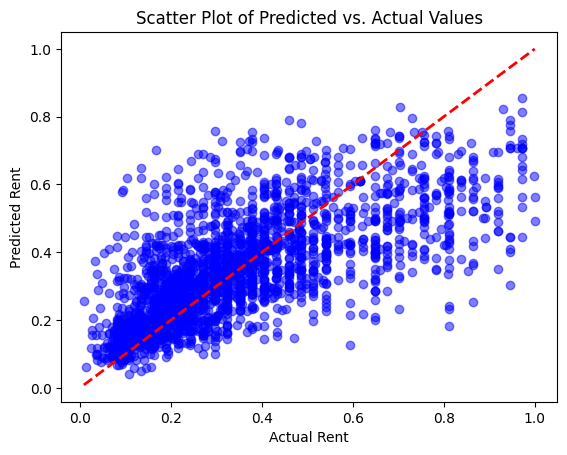

In [35]:
y_pred = xgbr.predict(X_test)
bin = np.arange(0,y_pred.max()+10000,100000)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
#plt.scatter(y_pred, bins, color='red', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xticks=bin
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Model Comparison</h1>

***The less the Root Mean Squared Error (RMSE), The better the model is.***

In [36]:
models

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression(),0.126394,0.029074,0.170511,0.338297,0.171567
1,Lasso(),0.165564,0.043938,0.209615,-0.000006,0.211248
2,ElasticNet(),0.165564,0.043938,0.209615,-0.000006,0.211248
3,"SVR(C=10, kernel='poly')",0.122440,0.029088,0.170552,0.337982,0.180169
4,"XGBRegressor(base_score=None, booster=None, ca...",0.110475,0.023237,0.152438,0.471136,0.169466


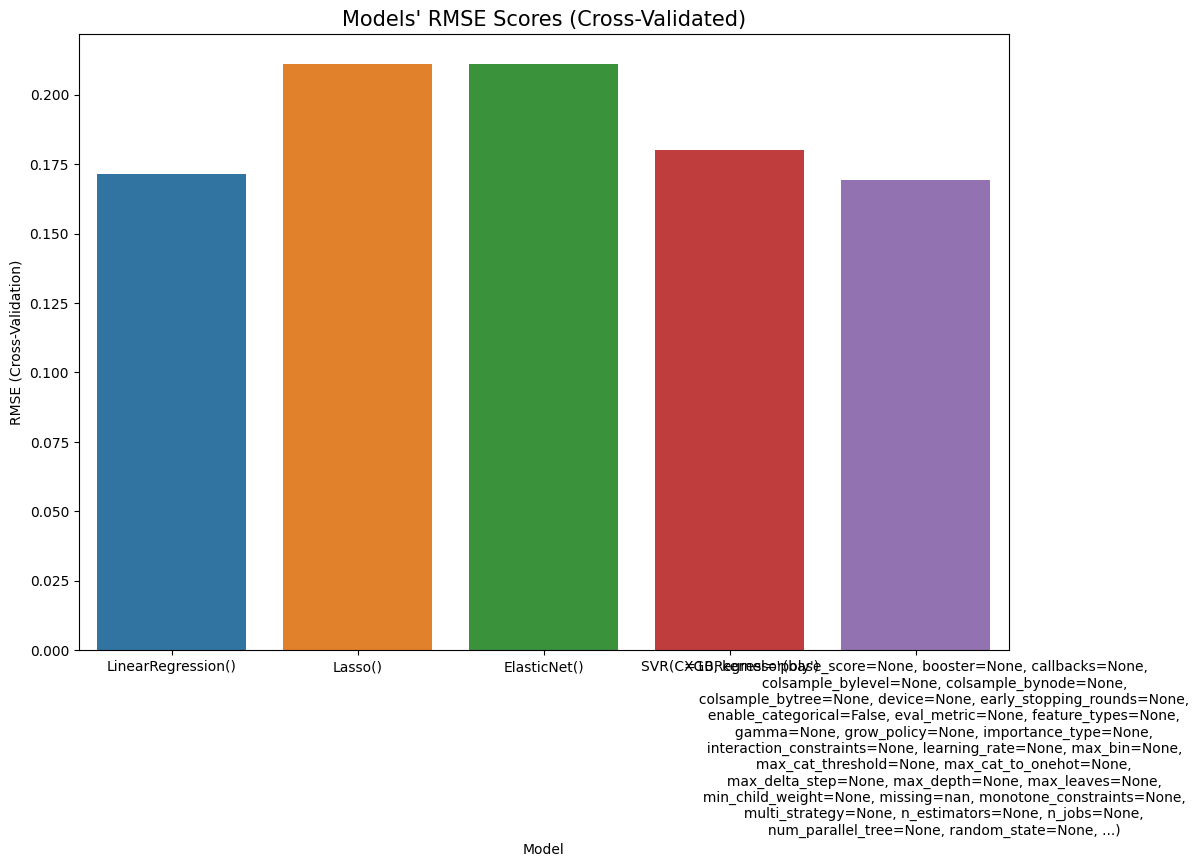

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.show()

In [38]:
with open('xgboost_regressor_model.pkl', 'wb') as file:
    pickle.dump(xgbr, file)